<a href="https://colab.research.google.com/github/1900690/strawberry/blob/main/eye_camera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#アプリの使い方

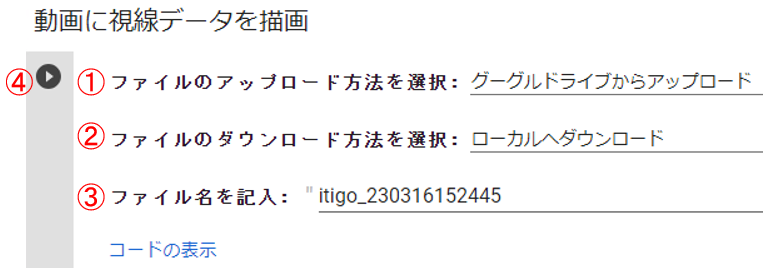

1.   ファイルのアップロード方法を選択する  
      ※動画ファイル（.mp4）と視線データ(.json)を両方アップロードしてください  
      ※ファイルサイズが大きいとアップロードに時間がかかるため、グーグルドライブ経由でアップロードすることを推奨します。
2.   ファイルのダウンロード方法を選択する  
      ※ローカルへダウンロードの場合、加工済みの動画は自動的にダウンロードされます。        
      ※ファイルサイズが大きいとダウンロードに時間がかかるため、グーグルドライブ経由でダウンロードすることを推奨します。
3.   ファイル名を記入する  
      ※拡張子無しのファイル名を記入してください
4.   実行ボタンを押す  
      ※加工済みの動画は自動的にダウンロードされます


In [ ]:
#@title 動画に視線データを描画
#ライブラリをインポート
from pandas.core.base import doc
import shutil
import os
from google.colab import files
import pandas as pd
from PIL import Image
import cv2

ファイルのアップロード方法を選択 = '\u30B0\u30FC\u30B0\u30EB\u30C9\u30E9\u30A4\u30D6\u304B\u3089\u30A2\u30C3\u30D7\u30ED\u30FC\u30C9' #@param ["グーグルドライブからアップロード", "ローカルからアップロード"]
ファイルのダウンロード方法を選択 = '\u30ED\u30FC\u30AB\u30EB\u3078\u30C0\u30A6\u30F3\u30ED\u30FC\u30C9' #@param ["グーグルドライブへアップロード", "ローカルへダウンロード"]

ファイル名を記入 = "itigo_230316152445" #@param {type:"string"}

if ファイルのアップロード方法を選択 == 'ローカルからアップロード':
  #データをアップロード
  uploaded = files.upload()

  #ファイル名を取得
  ファイル名を記入 = os.path.splitext(list(uploaded.keys())[0])[0]

if ファイルのアップロード方法を選択 == 'グーグルドライブからアップロード':
  #グーグルドライブに接続
  from google.colab import drive
  drive.mount('/content/drive')

  #グーグルドライブからcontentにコピー
  shutil.copyfile("/content/drive/MyDrive/"+ファイル名を記入+".mp4","/content/"+ファイル名を記入+".mp4")
  shutil.copyfile("/content/drive/MyDrive/"+ファイル名を記入+".json","/content/"+ファイル名を記入+".json")

#視線データを読み込み必要な部分を抽出
json_file = "/content/"+ファイル名を記入+".json"
df = pd.read_json(json_file)
df2=df["EyeData"].iloc[2]
df3 = pd.json_normalize(df2)
df6=df3[['recomValid','recomPoint.x','recomPoint.y']]

# 動画ファイルのキャプチャー
cap = cv2.VideoCapture("/content/"+ファイル名を記入+".mp4")

# 動画ファイルのフレームレート取得
fps = cap.get(cv2.CAP_PROP_FPS)

#動画のサイズを取得
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
size = (width,height)
point_size=max(width,height)

# 保存用動画ファイルのフォーマット設定
fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
out = cv2.VideoWriter("/content/"+ファイル名を記入+"point.mp4", fourcc, fps, size)

# 動画を1コマずつ取り込んで処理
while(cap.isOpened()):
    ret, frame = cap.read() # キャプチャー画像の取り込み

    if ret==True: # キャプチャー画像がある場合
        # 現在時間を取得
        time = cap.get(cv2.CAP_PROP_POS_MSEC)

        # 現在のフレーム数を取得
        frame_n = cap.get(cv2.CAP_PROP_POS_FRAMES)

        # タイムコードを作成
        timecode = str(int(time//1000)).zfill(2)+':'+str(int(frame_n%fps)).zfill(2)

        # 縦横半分にリサイズ
        #resize = cv2.resize(frame, size)

        # 視点を描画
        cv2.drawMarker(frame, (int(df6.loc[int(frame_n)][1]*width),int(df6.loc[int(frame_n)][2]*height)), (0, 0, 255),cv2.MARKER_CROSS,int(point_size/10),int(point_size/100))

        # mp4動画を保存
        out.write(frame)

    else: # キャプチャー画像がない場合はループ終了
        break

cap.release() # 再生画像をクローズ
out.release() # 出力動画ファイルをクローズ
if ファイルのダウンロード方法を選択 == 'ローカルへダウンロード':
  #ダウンロード
  files.download("/content/"+ファイル名を記入+"point.mp4")

if ファイルのダウンロード方法を選択 == 'グーグルドライブへアップロード':
  shutil.copyfile("/content/"+ファイル名を記入+"point.mp4","/content/drive/MyDrive/"+ファイル名を記入+"point.mp4")